In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench.util import load_results

In [2]:
results1 = load_results(r'constant-policies.tar.gz')
experiments1, outcomes1 = results1

#I've used ArrayOutcomes where I should have used TImeSeries (dunno if that was at all possible)
#so now I need to make a new array where I take the averages for each scenario at least

avg_unc_time = []

for i in range(0,outcomes1['Uncertainty over Time'].shape[0]):
    data = outcomes1['Uncertainty over Time'][i]
    #print([sum(e)/len(e) for e in zip(*data)])
    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])


outcomes1['Avg Uncertainty over Time'] = np.array(avg_unc_time)

C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


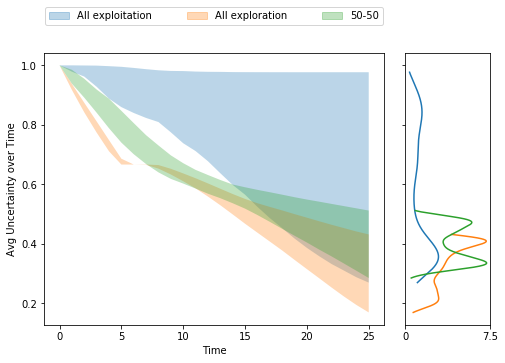

In [4]:
import matplotlib.pyplot as plt

#from expWorkbench import load_results
from ema_workbench.analysis.plotting import envelopes, lines, Density
import ema_workbench.analysis.plotting_util as plottingUtil
from numpy import array

plottingUtil.TIGHT= True

policies = experiments1['policy']

outcomes1['TIME'] = np.array([i for i in range(0,26)],  ndmin=2)

# make an envelope
fig, axesdict = envelopes(experiments1, outcomes1,
                outcomes_to_show=['Avg Uncertainty over Time'], 
                group_by='policy', 
                grouping_specifiers=['All exploitation', 'All exploration', '50-50'],
                legend=True,
                density=Density.KDE, fill=True,titles=None)

# set the size of the figure to look reasonable nice
fig.set_size_inches(8,5)

In [3]:
final_uncertainty = []
for i in range(0, outcomes1['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes1['Avg Uncertainty over Time'][i][-1])
    
outcomes1['final uncertainty'] = np.array(final_uncertainty)

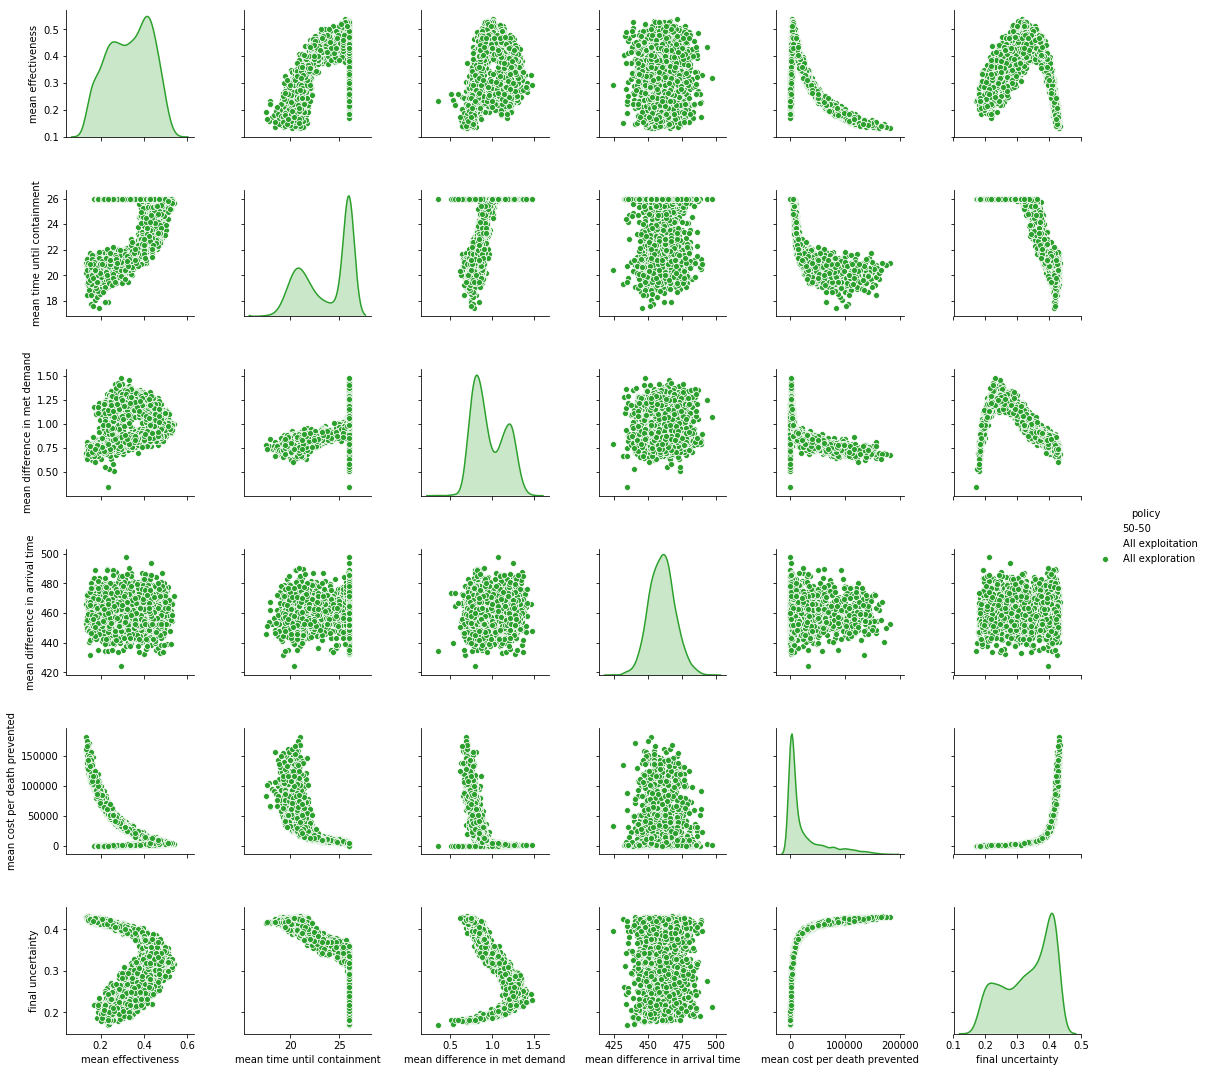

In [11]:

policies = experiments1['policy']

#all objectives are minimized, so the model outcome for effectiveness is negative
#flip the sign to make it easier to understand (as high effectiveness is desirable!)
outcomes1['mean effectiveness'] = [ -x for x in outcomes1['mean effectiveness']]


#the ArrayOutcomes aren't suitable for this type of analysis, so make a subselection without them
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']
data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))


data['policy'] = policies

sns.pairplot(data.loc[data['policy'] == 'All exploration'], hue='policy',  vars=oneDkeys, )
plt.show()

### Now let's look at the actual policies ###

In [3]:
results2 = load_results(r'policies-functions.tar.gz')
experiments2, outcomes2 = results2

#I've used ArrayOutcomes where I should have used TImeSeries (dunno if that was at all possible)
#so now I need to make a new array where I take the averages for each scenario at least


avg_unc_time = []

for i in range(0,outcomes2['Uncertainty over Time'].shape[0]):
    data = outcomes2['Uncertainty over Time'][i]

    avg_unc_time.append([sum(e)/len(e) for e in zip(*data)])

    

outcomes2['Avg Uncertainty over Time'] = np.array(avg_unc_time)


C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


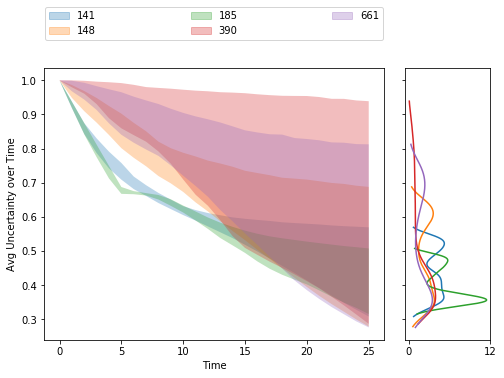

In [4]:
import matplotlib.pyplot as plt

#from expWorkbench import load_results
from ema_workbench.analysis.plotting import envelopes, lines, Density
import ema_workbench.analysis.plotting_util as plottingUtil
from numpy import array

plottingUtil.TIGHT= True

policies = experiments2['policy']

outcomes2['TIME'] = np.array([i for i in range(0,26)],  ndmin=2)


# make an envelope
fig, axesdict = envelopes(experiments2, outcomes2,
                outcomes_to_show=['Avg Uncertainty over Time'], 
                group_by='policy', 
                
                legend=True,
                density=Density.KDE, fill=True,titles=None)

# set the size of the figure to look reasonable nice
fig.set_size_inches(8,5)

In [5]:

final_uncertainty = []
for i in range(0, outcomes2['Avg Uncertainty over Time'].shape[0]):
    final_uncertainty.append(outcomes2['Avg Uncertainty over Time'][i][-1])
    
outcomes2['final uncertainty'] = np.array(final_uncertainty)

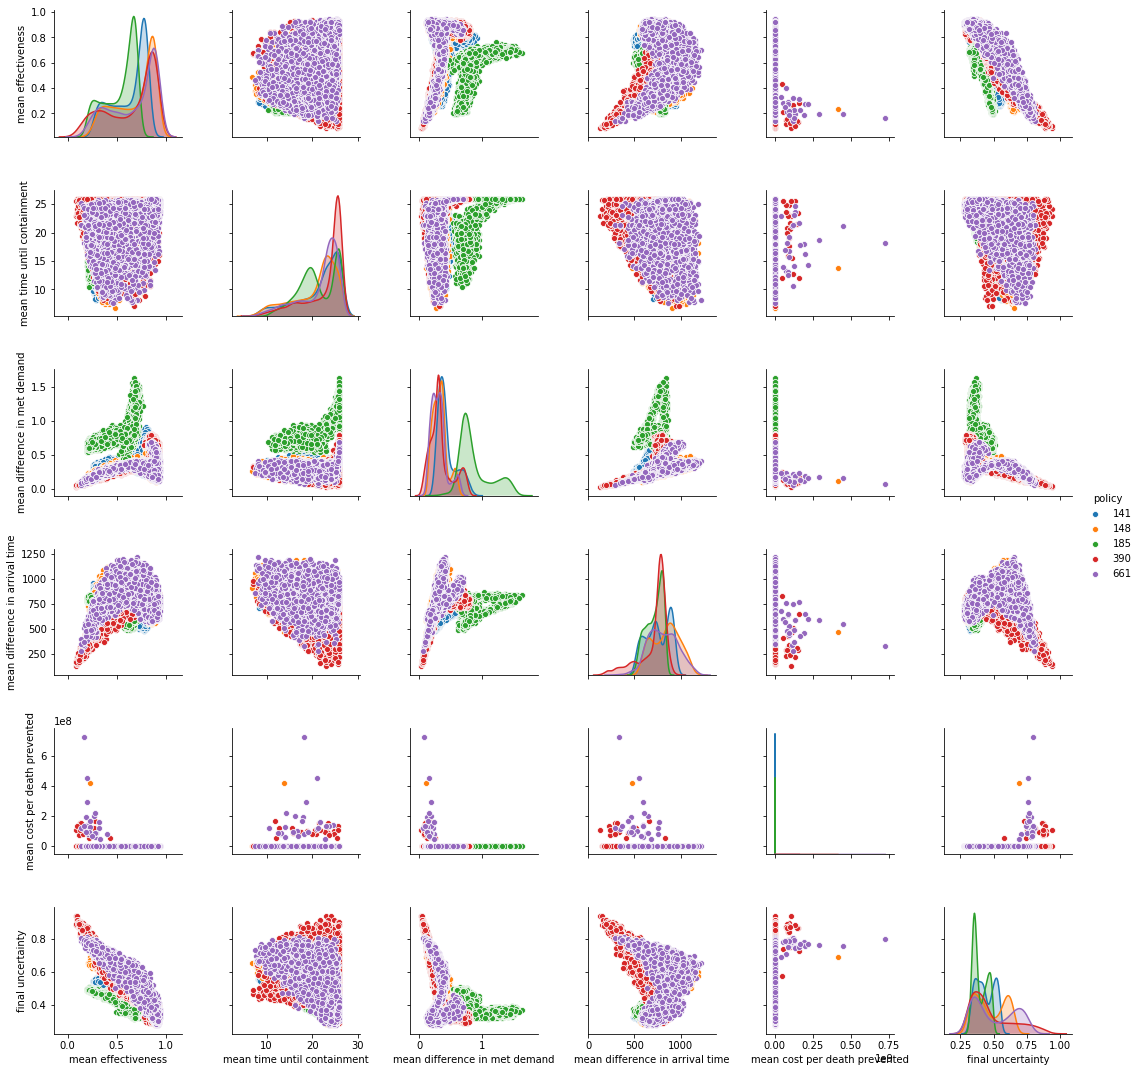

In [6]:
policies = experiments2['policy']

#all objectives are minimized, so the model outcome for effectiveness is negative
#flip the sign to make it easier to understand (as high effectiveness is desirable!)
outcomes2['mean effectiveness'] = [ -x for x in outcomes2['mean effectiveness']]


#the ArrayOutcomes aren't suitable for this type of analysis, so make a subselection without them
oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented', 'final uncertainty']
data = pd.DataFrame.from_dict(dict((k, outcomes2[k]) for k in oneDkeys if k in outcomes2))


data['policy'] = policies

            #data.loc[data['policy'] == 390]
sns.pairplot(data, hue='policy',  vars=oneDkeys,)
plt.show()

### EMA Exploratory Analysis ###
Data prep to study one policy

In [5]:
###CONSTANT POLICIES###
policies = experiments1['policy']

outcomes1['mean effectiveness'] = [ -x for x in outcomes1['mean effectiveness']]

oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']

data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies


df = data.loc[data['policy'] == 'All exploitation']



keys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']



cleaned_outcomes = dict((keys[i], df[keys[i]].to_numpy()) for i in range(0,5) )

cleaned_outcomes

sub_exp = experiments1.loc[experiments1['policy'] == 'All exploitation']
cleaned_experiments = sub_exp.drop(labels=['exploration_ratio','policy','model', 'scenario'], axis=1)

### Actual Analysis  - All Exploitation Policy ###

C:\Users\Emma\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<IPython.core.display.Javascript object>


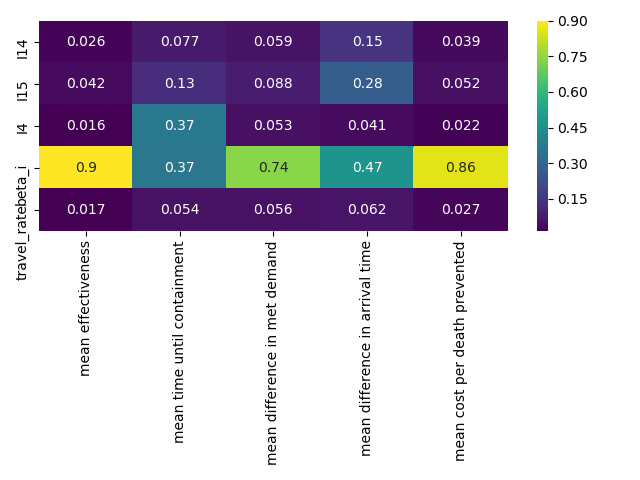

In [6]:
%matplotlib notebook

from ema_workbench.analysis import feature_scoring



fs = feature_scoring.get_feature_scores_all(cleaned_experiments, cleaned_outcomes)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.tight_layout()
plt.show()

### All-exploitation: ###
So the transmission rate is still the most important for effectiveness and efficiency (already saw that those were closely related). Also for mean difference in met demand, likely due to the number of cases "exploding". Interestingly, for mean time until containment and meand difference in arrival times things are less clear-cut.
Hyptohesis for time until containment: 1) a high transmission rate leads to regions being discovered more quickly, and 2)if I4 has a low number of cases, 70% of the epidemic can be contained by solely focussing on regions 14 and 15.
Hypothesis for mean difference in arrival time: I15 and I14 having a high number of cases but with a lower transmission rate (or at least not the highest one) will lead to these regions being discovered quite quickly, without the disease itself progressing rapidly. This allows for good scores in equity in met demand.




### Mean Effectiveness ###

[MainProcess/INFO] 2500 points remaining, containing 1130 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3388, coverage: 0.7495575221238938, density: 1.0 restricted_dimensions: 1


<IPython.core.display.Javascript object>


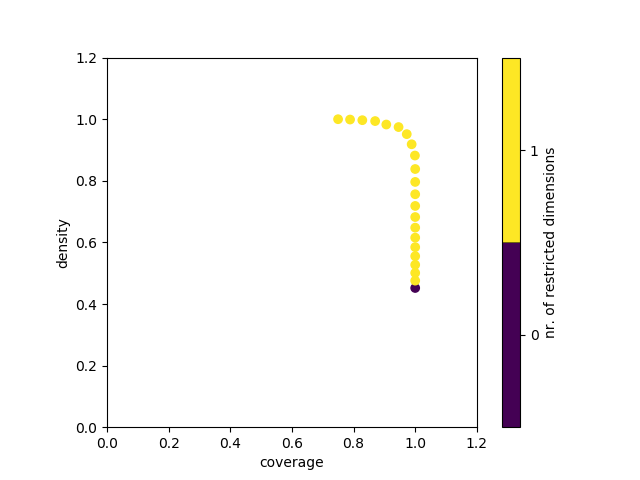

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

from ema_workbench.analysis import prim
from ema_workbench import ema_logging

x = cleaned_experiments

y = cleaned_outcomes['mean effectiveness'] > 0.8


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.972566
density     0.951515
id                15
mass           0.462
mean        0.951515
res_dim            1
Name: 15, dtype: object

          box 15                                           
             min       max                        qp values
beta_i  0.315196  0.499958  [2.8289445289166914e-298, -1.0]



<IPython.core.display.Javascript object>


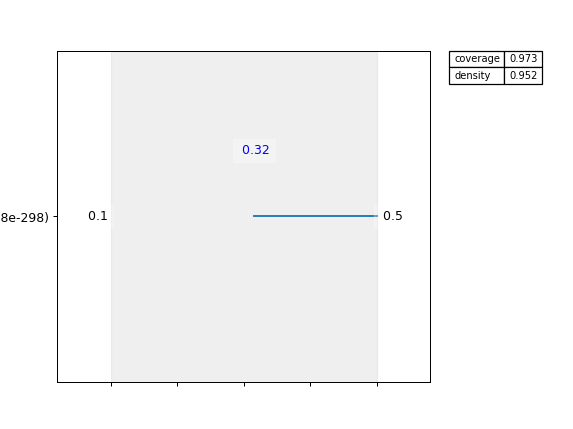

In [15]:
box1.inspect(15)
box1.inspect(15, style='graph')
plt.show()

[MainProcess/INFO] 2500 points remaining, containing 764 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1888, coverage: 0.6178010471204188, density: 1.0 restricted_dimensions: 2


<IPython.core.display.Javascript object>


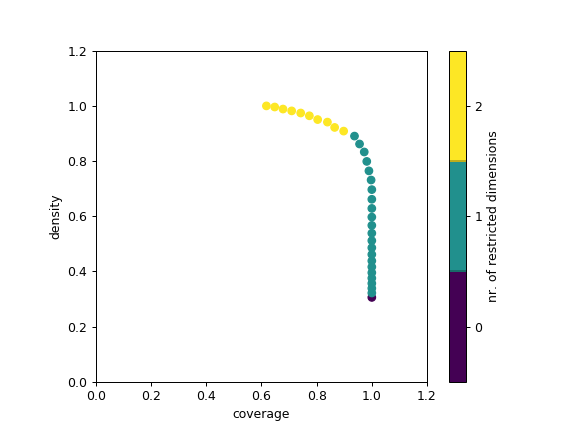

In [19]:
y = cleaned_outcomes['mean effectiveness'] < 0.5


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box2 = prim_alg.find_box()

box2.show_tradeoff()
plt.show()

coverage    0.865183
density     0.921897
id                24
mass          0.2868
mean        0.921897
res_dim            2
Name: 24, dtype: object

           box 24                                           
              min        max                       qp values
beta_i   0.100066   0.222372  [-1.0, 4.615000943894306e-259]
I15     25.000000  39.500000    [-1.0, 0.048917820929474796]



<IPython.core.display.Javascript object>


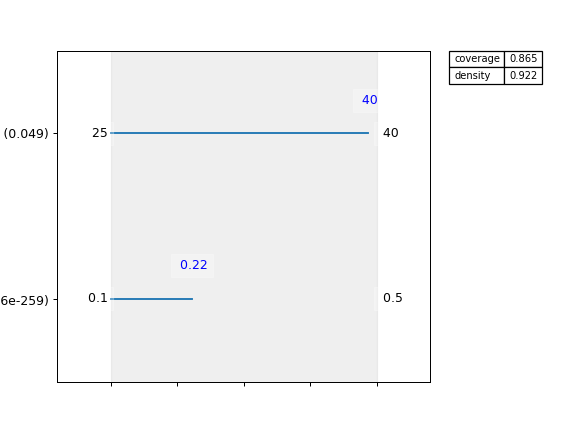

In [23]:
box2.inspect(24)
box2.inspect(24, style='graph')
plt.show()

[MainProcess/INFO] 2500 points remaining, containing 544 cases of interest
[MainProcess/INFO] mean: 0.9938650306748467, mass: 0.0652, coverage: 0.2977941176470588, density: 0.9938650306748467 restricted_dimensions: 4


<IPython.core.display.Javascript object>


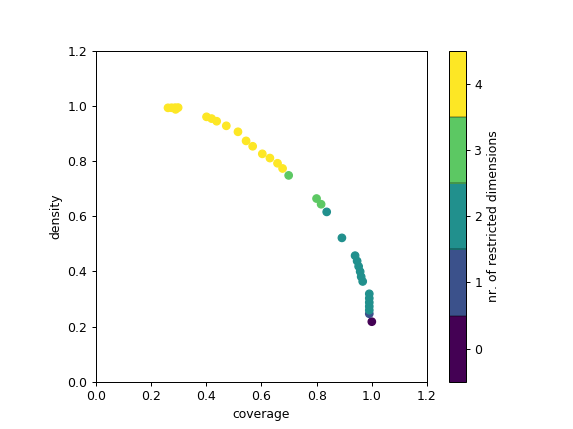

In [25]:
y = cleaned_outcomes['mean time until containment'] <= 20


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box3 = prim_alg.find_box()

box3.show_tradeoff()
plt.show()

In [33]:
box3.inspect(16)


coverage    0.799632
density     0.664122
id                16
mass           0.262
mean        0.664122
res_dim            3
Name: 16, dtype: object

           box 16                                           
              min        max                       qp values
I4       1.000000   4.500000  [-1.0, 2.0133772826066104e-49]
beta_i   0.100066   0.327788   [-1.0, 4.080463523639543e-45]
I15     25.500000  40.000000     [0.06053315163852955, -1.0]



<IPython.core.display.Javascript object>


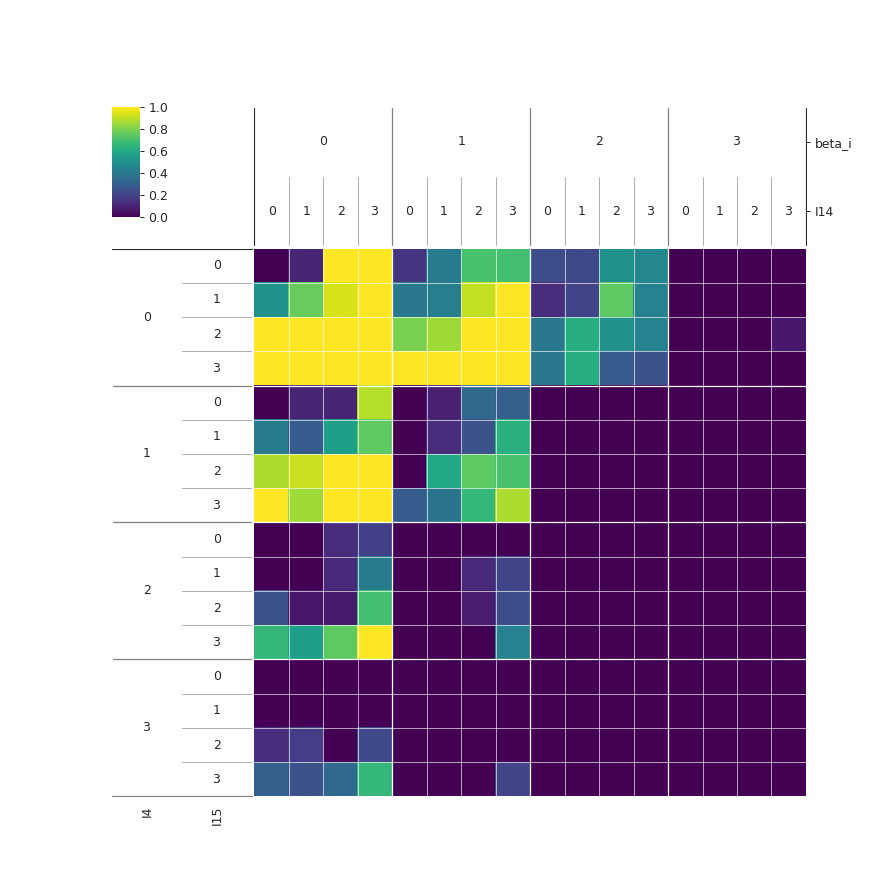

In [38]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=4)
plt.show()

So as expected: quick containment is possible when the transmission rate is low as is the intitial number of cases in region 4. There is then also a benefit if you have a high number of cases in region 14 or 15.

### mean difference in met demand ###

Scores with low difference in met demand and low effectiveness are explained as "equity in absence". What about the cases in which equity is high but effectiveness is also OK?

[MainProcess/INFO] 2500 points remaining, containing 466 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0728, coverage: 0.3905579399141631, density: 1.0 restricted_dimensions: 4


<IPython.core.display.Javascript object>


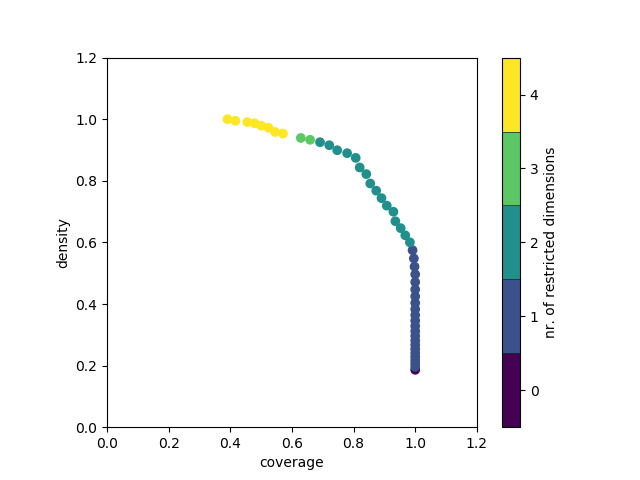

In [10]:
y1 = cleaned_outcomes['mean difference in met demand'] <= 0.25
y2 = cleaned_outcomes['mean effectiveness'] > 0.75

y = []

for a, b in zip(y1,y2):
    y.append(a and b)

numpy = np.array(y)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box4 = prim_alg.find_box()

box4.show_tradeoff()
plt.show()

In [11]:
box4.inspect(30)

coverage    0.873391
density     0.767925
id                30
mass           0.212
mean        0.767925
res_dim            2
Name: 30, dtype: object

               box 30            \
                  min       max   
beta_i       0.329750  0.427674   
travel_rate  0.048828  0.099978   

                                                               
                                                    qp values  
beta_i       [1.0869448259188836e-143, 6.694877293303863e-42]  
travel_rate                    [1.9901797233230242e-05, -1.0]  



So here you see the transmission rate still needs to be reasonably high - otherwise the regions don't get discovered. However, the highest values are not seen as these cause the situation to spiral out of control. The travel rate is almost the entire possible range, so unclear what it's doing here.

### Difference in Arrival Time ###

Best difference in arrival time scores are associated with very low effectiness -> equity in absence again. What causes good effectivness & decent difference in arrival time scores (<750?). And what about the "fork" you see when plotting the equity objectives against oneanother.

[MainProcess/INFO] 2500 points remaining, containing 549 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0848, coverage: 0.3861566484517304, density: 1.0 restricted_dimensions: 5


<IPython.core.display.Javascript object>


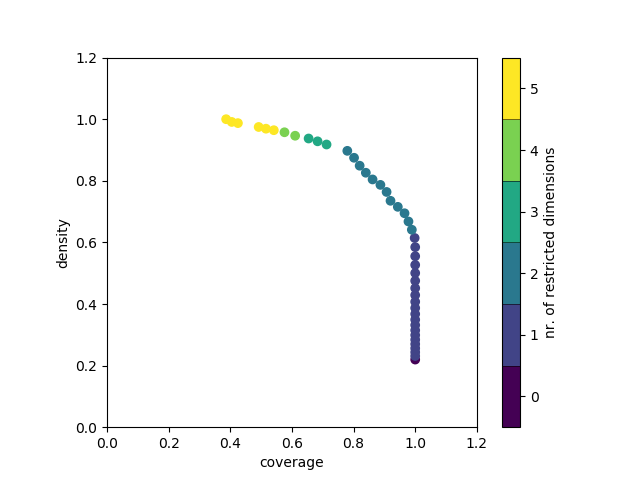

In [16]:
y1 = cleaned_outcomes['mean difference in arrival time'] <= 750
y2 = cleaned_outcomes['mean effectiveness'] > 0.75

y = []

for a, b in zip(y1,y2):
    y.append(a and b)

numpy = np.array(y)

#print(numpy)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box5 = prim_alg.find_box()

box5.show_tradeoff()
plt.show()

In [17]:
box5.inspect(30)

coverage    0.819672
density     0.849057
id                30
mass           0.212
mean        0.849057
res_dim            2
Name: 30, dtype: object

               box 30            \
                  min       max   
beta_i       0.344318  0.447888   
travel_rate  0.051030  0.099978   

                                                              
                                                   qp values  
beta_i       [1.7427784512447415e-167, 3.69333718142788e-39]  
travel_rate                    [3.461722117721533e-07, -1.0]  



So high values for the transmission rate (which makes sense as these cause high effectiveness). The travel rate range given represents almost the entire range for this variable so it isn't immediately clear what the effect is.

Let's see what happens for poor scores with high effectiveness.

[MainProcess/INFO] 2500 points remaining, containing 735 cases of interest
[MainProcess/INFO] mean: 0.8450704225352113, mass: 0.0568, coverage: 0.16326530612244897, density: 0.8450704225352113 restricted_dimensions: 5


<IPython.core.display.Javascript object>


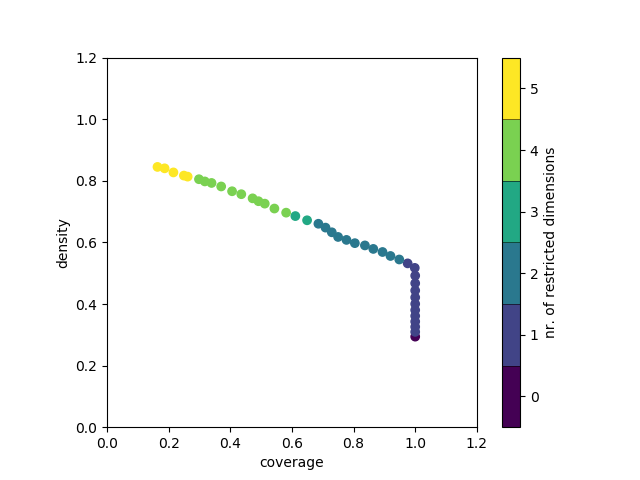

In [22]:
y1 = cleaned_outcomes['mean difference in arrival time'] > 750
y2 = cleaned_outcomes['mean effectiveness'] > 0.75

y = []

for a, b in zip(y1,y2):
    y.append(a and b)

numpy = np.array(y)

#print(numpy)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box6 = prim_alg.find_box()

box6.show_tradeoff()
plt.show()

In [24]:
box6.inspect(20)

coverage     0.74966
density     0.617713
id                20
mass          0.3568
mean        0.617713
res_dim            2
Name: 20, dtype: object

               box 20                                          
                  min       max                       qp values
travel_rate  0.040013  0.081669    [-1.0, 1.94236764163163e-06]
beta_i       0.294876  0.499958  [3.7300808159143394e-66, -1.0]



[MainProcess/INFO] 2500 points remaining, containing 333 cases of interest
[MainProcess/INFO] mean: 0.946969696969697, mass: 0.0528, coverage: 0.37537537537537535, density: 0.946969696969697 restricted_dimensions: 4


<IPython.core.display.Javascript object>


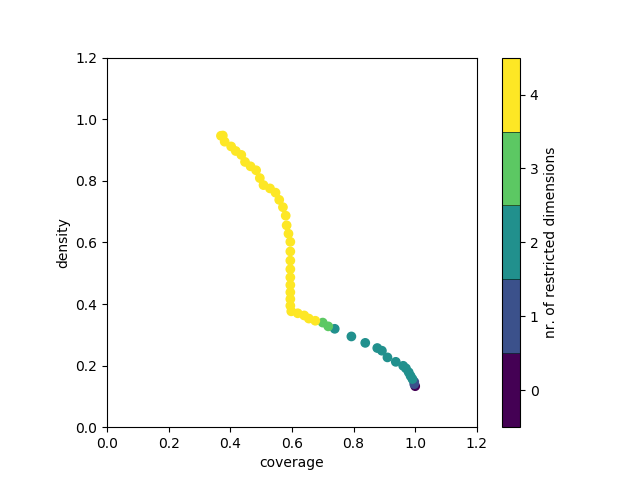

In [25]:
y = cleaned_outcomes['mean difference in arrival time'] > 1000


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box7 = prim_alg.find_box()

box7.show_tradeoff()
plt.show()

In [29]:
box7.inspect(35)

coverage    0.558559
density     0.738095
id                35
mass          0.1008
mean        0.738095
res_dim            4
Name: 35, dtype: object

                box 35             \
                   min        max   
travel_rate   0.040013   0.091206   
I15          34.500000  40.000000   
beta_i        0.183393   0.314998   
I14          21.500000  35.000000   

                                                             
                                                  qp values  
travel_rate                      [-1.0, 0.2847850329446053]  
I15                          [3.1376111606856283e-26, -1.0]  
beta_i       [5.326455301905226e-14, 2.600137186350569e-32]  
I14                               [0.371463189271297, -1.0]  



<IPython.core.display.Javascript object>


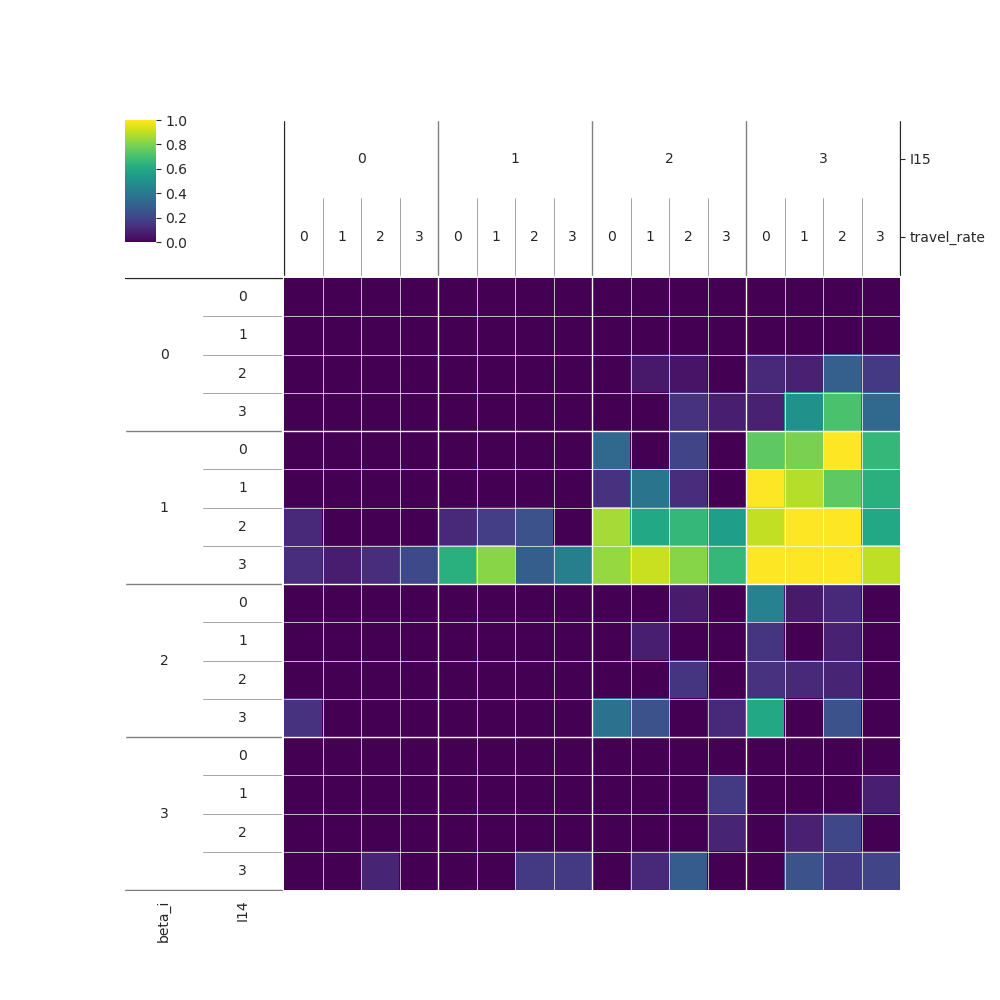

In [30]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, 2, nbins=4)
plt.show()

So: For poor difference in arrival time scores you need a high number of cases in either region 14 or 15 with a not-too-high transmission rate. This will lead to those regions being discovered through the spontaneous news function, whereas the other regions remain hidden longer due to slow case growth as a result of the lower transmission rate.

What about the split in outcomes seen when plotting the two equity objectives against eachother?

[MainProcess/INFO] 2500 points remaining, containing 827 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1024, coverage: 0.309552599758162, density: 1.0 restricted_dimensions: 3


<IPython.core.display.Javascript object>


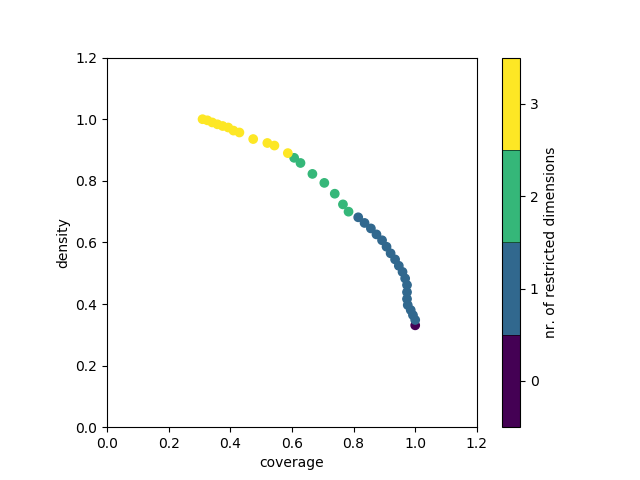

In [35]:
y1 = cleaned_outcomes['mean difference in arrival time'] > 800
y2 = cleaned_outcomes['mean difference in met demand'] < 0.45

y = []

for a, b in zip(y1,y2):
    y.append(a and b)

numpy = np.array(y)

#print(numpy)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box8 = prim_alg.find_box()

box8.show_tradeoff()
plt.show()

In [37]:
box8.inspect(20)

coverage    0.765417
density     0.723429
id                20
mass            0.35
mean        0.723429
res_dim            2
Name: 20, dtype: object

           box 20                                                             
              min        max                                         qp values
beta_i   0.190399   0.348687  [3.2990940973148304e-31, 2.2275365368398903e-80]
I15     26.500000  40.000000                      [0.003972648067423542, -1.0]



Almost all of the range for I15 and a sort of "middle" range for the transmission rate. That doesn't tell us a lot.

[MainProcess/INFO] 2500 points remaining, containing 285 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0648, coverage: 0.5684210526315789, density: 1.0 restricted_dimensions: 3


<IPython.core.display.Javascript object>


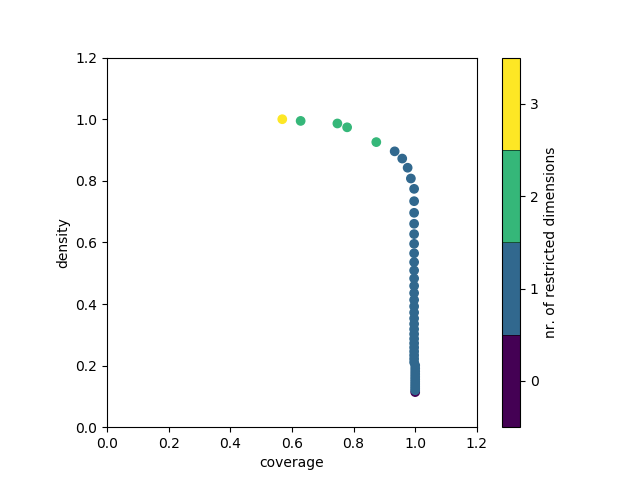

In [39]:
#don't need to specify difference in arrival time here as all relevant outcomes can already be selected with just difference in met demand
y = cleaned_outcomes['mean difference in met demand'] > 0.45


numpy = np.array(y)

#print(numpy)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box9 = prim_alg.find_box()

box9.show_tradeoff()
plt.show()

In [45]:
box9.inspect(42)

coverage    0.873684
density     0.925651
id                42
mass          0.1076
mean        0.925651
res_dim            2
Name: 42, dtype: object

          box 42                                           
             min       max                        qp values
beta_i  0.452498  0.499958  [1.9881691684660746e-199, -1.0]
I4      1.500000  8.000000      [0.06042470708196008, -1.0]



So - very high transmission rates lead to poor performance in difference in met demand - as is expected (due to the ratio "exploding" in between timesteps). Why is there such a small variety in difference in arrival time scores for this? Poorest arrival time scores won't be seen here as the high transmission rate causes many regions to be discovered and receiving aid. Likewise, the "best" scores for difference in arrival time are a case of "equity in absence", which doens't happen for such high transmission rates.

So these are the influences of the input factors for an all-exploitative policy. Is this any different for a more exploratory policy?

### Analysis of Fully Explorative Policy###


In [10]:
###CONSTANT POLICIES###
results1 = load_results(r'constant-policies.tar.gz')
experiments1, outcomes1 = results1

policies = experiments1['policy']

outcomes1['mean effectiveness'] = [ -x for x in outcomes1['mean effectiveness']]

oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']

data = pd.DataFrame.from_dict(dict((k, outcomes1[k]) for k in oneDkeys if k in outcomes1))

data['policy'] = policies


df = data.loc[data['policy'] == 'All exploration']



keys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']



cleaned_outcomes = dict((keys[i], df[keys[i]].to_numpy()) for i in range(0,5) )



sub_exp = experiments1.loc[experiments1['policy'] == 'All exploration']
cleaned_experiments = sub_exp.drop(labels=['exploration_ratio','policy','model', 'scenario'], axis=1)



[MainProcess/INFO] results loaded succesfully from C:\Users\Emma\PythonProjects\thesis2\thesis\Final Model\constant-policies.tar.gz


<IPython.core.display.Javascript object>


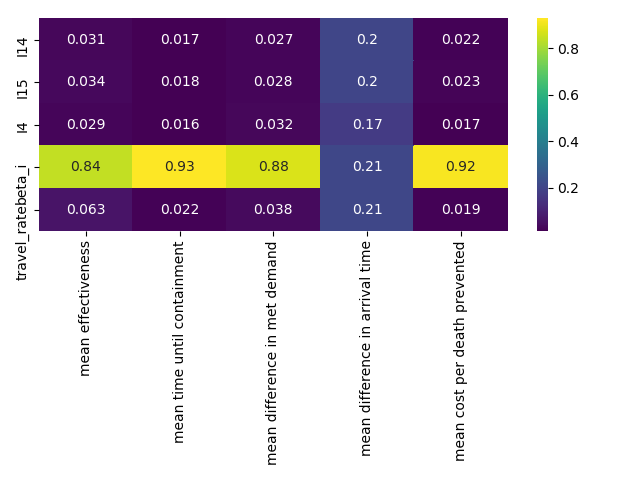

In [11]:
%matplotlib notebook

from ema_workbench.analysis import feature_scoring



fs = feature_scoring.get_feature_scores_all(cleaned_experiments, cleaned_outcomes)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.tight_layout()
plt.show()

Interestingly, quite different effects. Transmission rate is still a strong factor, now also for mean time until containment. Difference in arrival time now shares between all factors. But here it can be concluded that the input factors have no influence at all - the outcome distribution is very narrow. This makes sense given the explorative policy -> it is very robust in terms of equity in arrival time.

### Effectiveness ##

[MainProcess/INFO] 2500 points remaining, containing 791 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1632, coverage: 0.515802781289507, density: 1.0 restricted_dimensions: 2


<IPython.core.display.Javascript object>


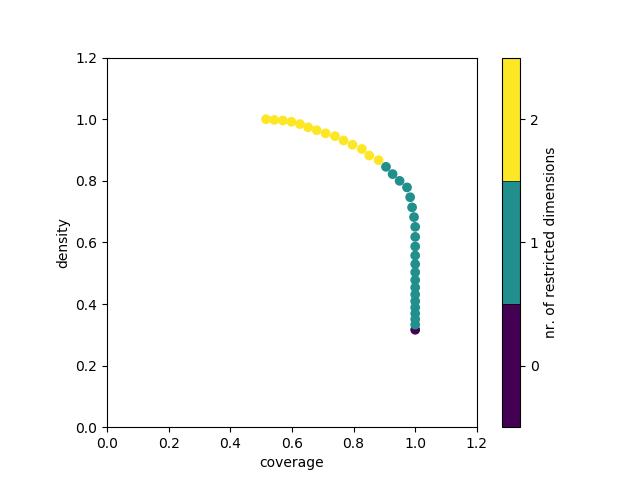

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

from ema_workbench.analysis import prim
from ema_workbench import ema_logging

x = cleaned_experiments

y = cleaned_outcomes['mean effectiveness'] > 0.4


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [13]:
box1.inspect(20)

coverage    0.926675
density     0.821749
id                20
mass          0.3568
mean        0.821749
res_dim            1
Name: 20, dtype: object

          box 20                                                            
             min       max                                         qp values
beta_i  0.245796  0.388501  [3.026536330290167e-141, 1.0469729857610768e-91]



[MainProcess/INFO] 2500 points remaining, containing 970 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5413533834586466, returning dump box


<IPython.core.display.Javascript object>


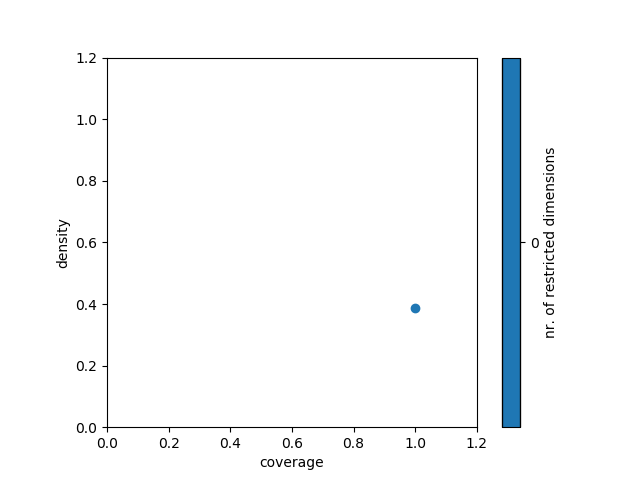

In [27]:
y = cleaned_outcomes['mean effectiveness'] < 0.3


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box2 = prim_alg.find_box()

box2.show_tradeoff()
plt.show()

<IPython.core.display.Javascript object>


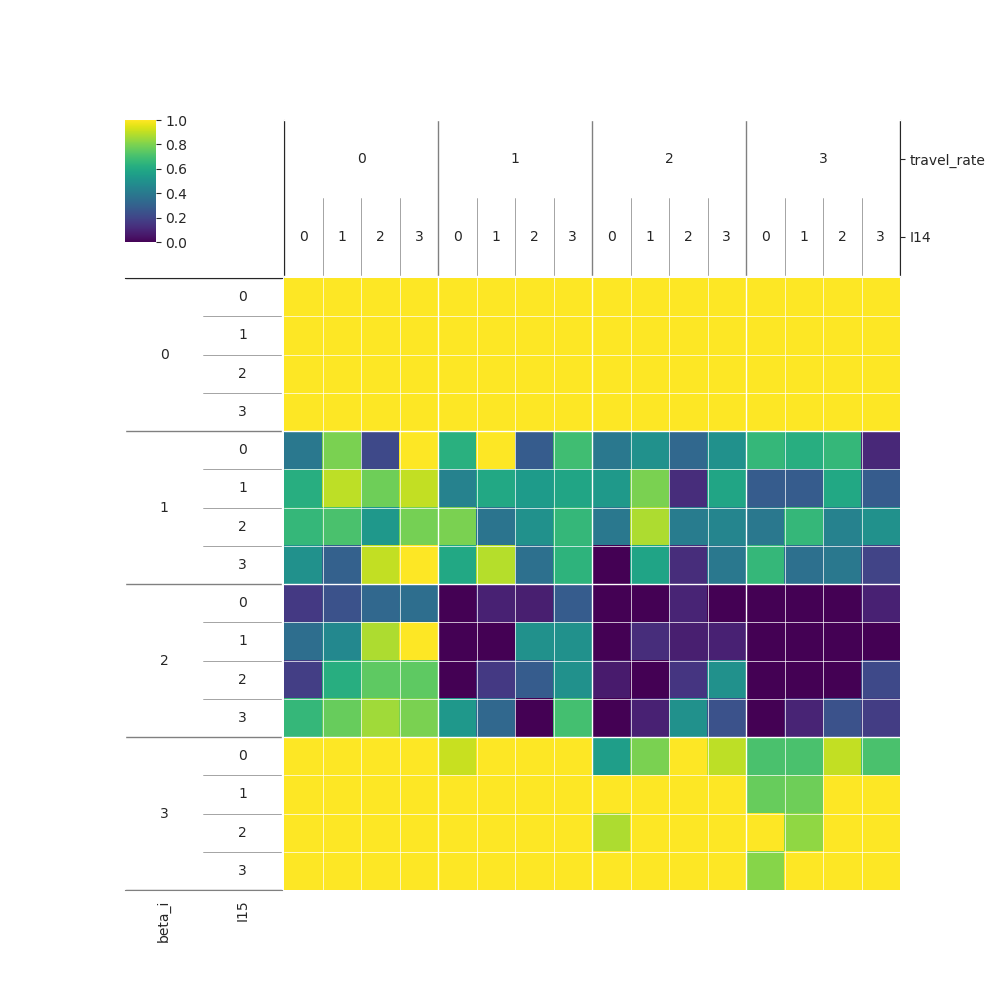

In [48]:
from ema_workbench.analysis import dimensional_stacking
y = cleaned_outcomes['mean effectiveness'] < 0.4


dimensional_stacking.create_pivot_plot(x,y, 2, nbins=4)
plt.show()

So primarily it's still very much the tranmsission rate.
Interestingly, for the lower outcomes the very highest number of intial cases in region 14 and 15 are also excluded. That seems really strange... Perhaps a high number of initial cases lead to those regions being discovered earlier, thereby leading to the explorative policies placing ETCs earlier (as the point in which no regions are hidden is reached earlier).



### Cost ###
The explorative policies do not have extreme outliers in terms of cost, but they do have quite long tails of high cost. When do these occur?

[MainProcess/INFO] 2500 points remaining, containing 667 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.2352, coverage: 0.881559220389805, density: 1.0 restricted_dimensions: 1


<IPython.core.display.Javascript object>


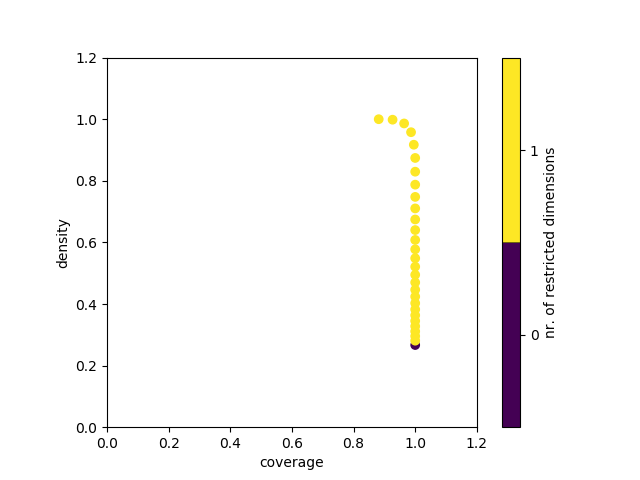

In [29]:
y = cleaned_outcomes['mean cost per death prevented'] > 30000


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box3 = prim_alg.find_box()

box3.show_tradeoff()
plt.show()

In [31]:
box3.inspect(25)

coverage    0.986507
density     0.957787
id                25
mass          0.2748
mean        0.957787
res_dim            1
Name: 25, dtype: object

          box 25                       
             min       max    qp values
beta_i  0.100066  0.209972  [-1.0, 0.0]



So high costs are caused by low infection rates - why? Low effectiveness -> a lot of money spent on saving very few people again. So also see high costs coincide with relatively high levels of final uncertainty in the scatterplot. In these cases, there was no sponaneous news, so the policy spends longer just sending out surveillance teams. This leads to poorer effectiveness scores.

### Time Until Containment ###

[MainProcess/INFO] 2500 points remaining, containing 1263 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.462, coverage: 0.9144893111638955, density: 1.0 restricted_dimensions: 1


<IPython.core.display.Javascript object>


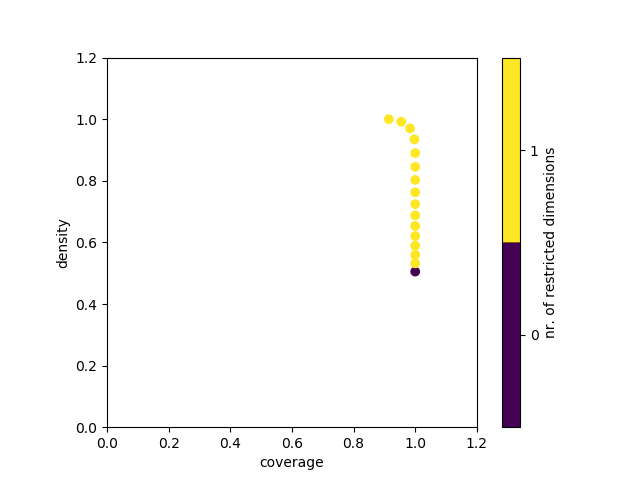

In [32]:
y = cleaned_outcomes['mean time until containment'] > 25


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box4 = prim_alg.find_box()

box4.show_tradeoff()
plt.show()

In [35]:
box4.inspect(12)

coverage    0.997625
density     0.934718
id                12
mass          0.5392
mean        0.934718
res_dim            1
Name: 12, dtype: object

          box 12                                           
             min       max                        qp values
beta_i  0.284349  0.499958  [2.4503209689478715e-261, -1.0]



[MainProcess/INFO] 2500 points remaining, containing 1147 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3956, coverage: 0.8622493461203139, density: 1.0 restricted_dimensions: 1


<IPython.core.display.Javascript object>


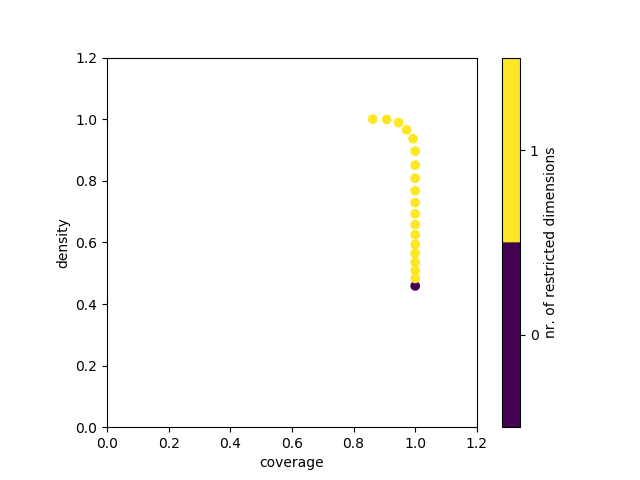

In [36]:
y = cleaned_outcomes['mean time until containment'] < 24


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box5 = prim_alg.find_box()

box5.show_tradeoff()
plt.show()

In [38]:
box5.inspect(14)

coverage    0.993025
density     0.936678
id                14
mass          0.4864
mean        0.936678
res_dim            1
Name: 14, dtype: object

          box 14                                          
             min       max                       qp values
beta_i  0.100066  0.294514  [-1.0, 2.474661881671871e-283]



easy peasy lemony squeezy: When the infection rate is too high, there are too many cases to be contained by small ETCs once this policy starts placing them. When the infection rate is lower, this is still managable and the epidemic can be "contained" just before the end of the run. 

### Difference in Met Demand ###

[MainProcess/INFO] 2500 points remaining, containing 1517 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3444, coverage: 0.5675675675675675, density: 1.0 restricted_dimensions: 3


<IPython.core.display.Javascript object>


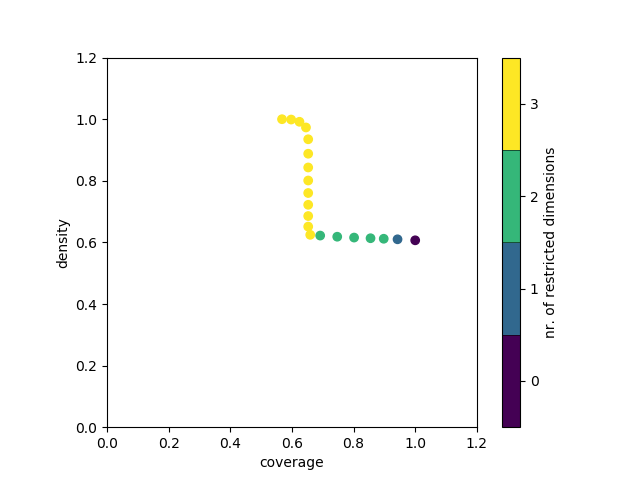

In [39]:
y = cleaned_outcomes['mean difference in met demand'] < 1.0


numpy = np.array(y)

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, numpy, threshold=0.8)
box6 = prim_alg.find_box()

box6.show_tradeoff()
plt.show()

In [41]:
box6.inspect(16)

coverage    0.645353
density     0.973161
id                16
mass          0.4024
mean        0.973161
res_dim            3
Name: 16, dtype: object

                box 16                                                     
                   min        max                                 qp values
beta_i        0.100066   0.333377            [-1.0, 5.403387208376869e-161]
I15          25.000000  36.500000               [-1.0, 0.05660702715645569]
travel_rate   0.043004   0.097073  [0.5897786491904389, 0.5024122960611822]



<IPython.core.display.Javascript object>


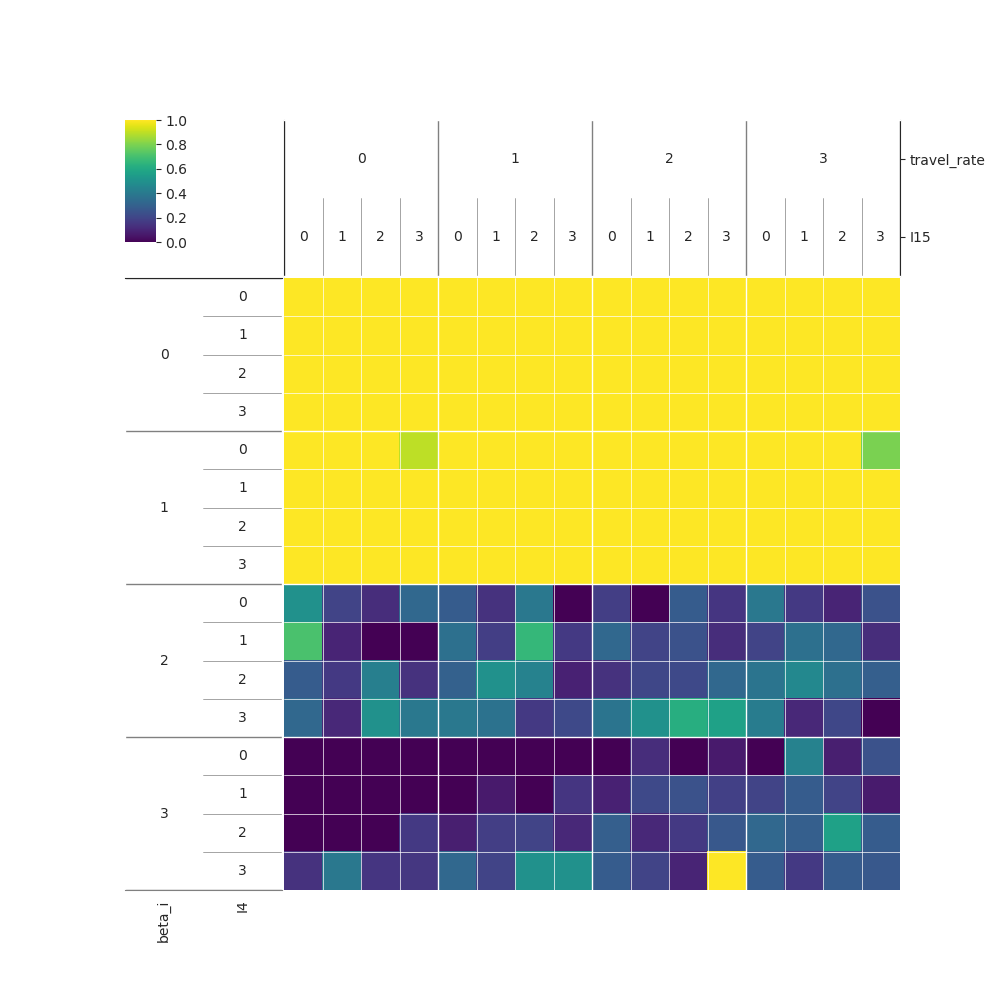

In [47]:
x = x.reset_index(drop=True)
#print(x)
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=4)
plt.show()

In [12]:
###POLICY FUNCTIONS###
policies = experiments2['policy']

outcomes2['mean effectiveness'] = [ -x for x in outcomes2['mean effectiveness']]

oneDkeys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']

data = pd.DataFrame.from_dict(dict((k, outcomes2[k]) for k in oneDkeys if k in outcomes2))

data['policy'] = policies


df = data.loc[data['policy'] == 185]



keys = ['mean effectiveness', 'mean time until containment', 'mean difference in met demand',
            'mean difference in arrival time', 'mean cost per death prevented']



cleaned_outcomes = dict((keys[i], df[keys[i]].to_numpy()) for i in range(0,5) )

cleaned_outcomes

sub_exp = experiments2.loc[experiments2['policy'] == 185]
cleaned_experiments = sub_exp.drop(labels=['policy','model', 'scenario',
                                          'c1', 'c2', 'r1', 'r2', 'w',], axis=1)

### Actual Analysis ###